In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import RotatedSurfaceCode, ThresholdLAB,CssCode

In [2]:
rsc = RotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

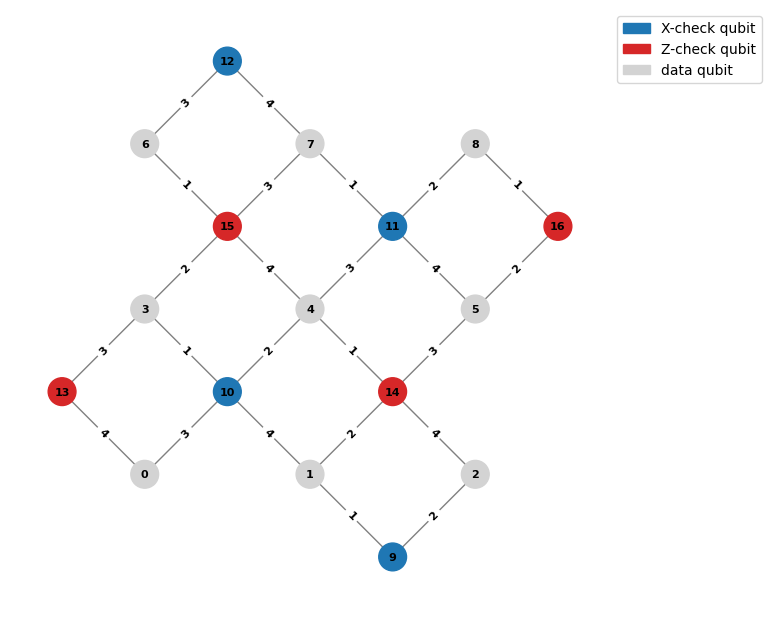

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=3, logic_check="X")
rsc.memory_circuit.diagram()

q0: -RX-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)------------MX:rec[24]-DETECTOR:D21=rec[27]*rec[28]*rec[24]*rec[25]*rec[17]-OBSERVABLE_INCLUDE:L0*=rec[24]*rec[27]*rec[30]-
                                                                                                                                                                                                                                                                                               | |                                                                                                                                                                                 | |                                                                                                                                                                                                                                                                                                                                                                                                                  | |                                                                                                                                                                                 | |                                                                                                                                                                                                                                                                                                                                                                                                                            | |                                                                                                                                                                                 | |
 q1: -RX-DEPOLARIZE1(0.01)---------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)---------------------------

In [5]:
rsc.build_memory_circuit(number_of_rounds=2, logic_check="X")
rsc.memory_circuit.diagram()

q0: -RX-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[16]-DETECTOR:D13=rec[19]*rec[20]*rec[16]*rec[17]*rec[9]--OBSERVABLE_INCLUDE:L0*=rec[16]*rec[19]*rec[22]-
                                                                                                                                                                                                                                                                                               | |                                                                                                                                                                                 | |                                                                                                                                                                                                                                                                                                                                                                                                                  | |                                                                                                                                                                                 | |
 q1: -RX-DEPOLARIZE1(0.01)---------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|----------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[17]-DETECTOR:D12=rec[17]*rec[18]*rec[8]-----------------------------------------------------------------
                                               | |                                                                                                                                                                                 | |                                                         | |                                                     

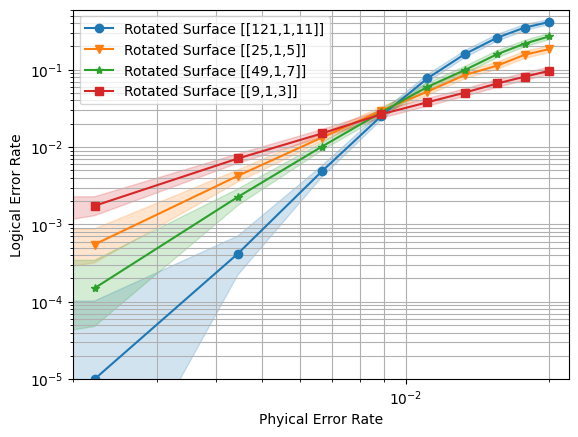

In [6]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = RotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="Z"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)

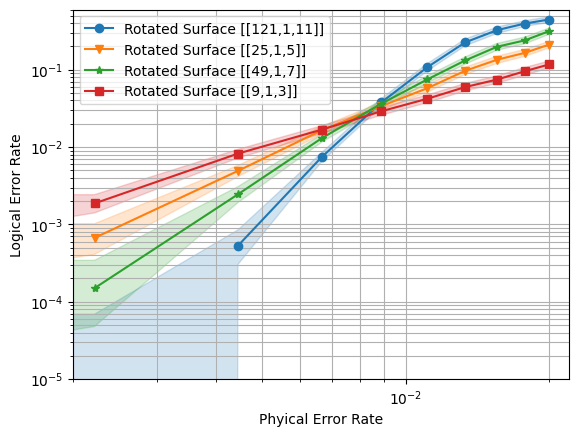

In [7]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = RotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="X"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)